In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
# drop time column, normailize Amount column
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
#creating new normalize Amount column
df['NormAmount']= scalar.fit_transform(df['Amount'].values.reshape(-1,1))

#dropping
df.drop(['Time','Amount'],axis = 1, inplace = True)

In [10]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [11]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

<AxesSubplot:xlabel='Class', ylabel='count'>

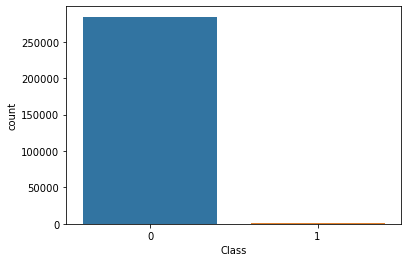

In [12]:
# visualizing the result
sns.countplot(data = df, x = 'Class')

In [13]:
#putting independent variable to last
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    a,b = col_list.index(col1), col_list.index(col2)
    col_list[b], col_list[a] = col_list[a], col_list[b]
    df = df[col_list]
    return df

In [14]:
#swapping columns
df = swap_columns(df,'Class','NormAmount')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,NormAmount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
#dividing dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

**stratify** parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

In [16]:
#splitting data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=42)

In [17]:
#Checking proportions of normal and fraud transactions in training and testing datasets
print('Training Dataset: \n', pd.value_counts(y_train))
print('Testing Dataset: \n', pd.value_counts(y_test))

Training Dataset: 
 0    227451
1       394
Name: Class, dtype: int64
Testing Dataset: 
 0    56864
1       98
Name: Class, dtype: int64


The dataset is divided into equal class proportions. Now we have to do the resampling.

Generally, there are two types of resampling methods.

1 Random Oversampling
2 Random Undersampling
However, resampling has drawbacks, especially when the target class is as highly imbalanced as in our case.

Firstly, oversampling the minority class might lead to overfitting, i.e. the model learns patterns that only exist in the particular sample that has been oversampled.

Secondly, undersampling the majority class might lead to underfitting, i.e. the model fails to capture the general pattern in the data.

There are many variations of resampling. We will use **Synthetic Minority Oversampling Technique (SMOTE)** which uses oversampling method.

Also there is **Near Miss Algorithm** which uses undersampling method. In this case, we will use **SMOTE**.

## Resampling the Dataset using SMOTE

In [20]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=2)
#resampling
#Ravel return a contiguous flattened array
X_train_os,y_train_os = oversample.fit_resample(X_train,y_train.ravel())

In [21]:
# number of rows containing normal and fraud transactions before oversampling
print('Number of Normal Transactions before oversampling: ',len(y_train[y_train == 0]))
print('Number of Fraud Transactions before oversampling: ',len(y_train[y_train == 1]))

Number of Normal Transactions before oversampling:  227451
Number of Fraud Transactions before oversampling:  394


In [22]:
# number of rows containing normal and fraud transactions after oversampling
print('Number of Normal Transactions after oversampling: ',len(y_train_os[y_train_os == 0]))
print('Number of Fraud Transactions after oversampling: ',len(y_train_os[y_train_os == 1]))

Number of Normal Transactions after oversampling:  227451
Number of Fraud Transactions after oversampling:  227451


## Training XGBoost model on the resampled training dataset

In [32]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier(objective = 'binary:logistic', random_state = 42)
#fitting
clf_xgb.fit(X_train_os,y_train_os)

D:\Users\Utsav.Sharma\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:10:30] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## Evaluating the model

In [33]:
#tesint model on testing dataset
y_pred= clf_xgb.predict(X_test)

## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print('Accuracy of the testing data is: {:.2f} %'.format(accuracy_score(y_test, y_pred)*100))

[[56833    31]
 [   12    86]]
Accuracy of the testing data is: 99.92 %


Even though the accuracy is almost 100% we can see there are still some missclassified points.

31 were classified as **False Positives** (classified as Fraud while they are Normal transactions)

12 were classified as **False Negatives** (classified as Normal while they are Fraud transactions)

We have to be careful about False Negatives as they affect a lot. So the accuracy is not the merit we are looking for.

Rather we use **Precision (for False Positives), Recall (for False Negatives), and F-Score (for both the affects)**

## Precision, Recall and F-Score

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision is: {:.2f} %'.format(precision_score(y_test, y_pred)*100))
print('Recall is: {:.2f} %'.format(recall_score(y_test, y_pred)*100))
print('F-score is: {:.2f} %'.format(f1_score(y_test, y_pred)*100))

Precision is: 73.50 %
Recall is: 87.76 %
F-score is: 80.00 %


When dealing with the imbalanced dataset it is always better to use **'AUPRC'** as a metric.

## Area Under Precision-Recall Curve

In [37]:
from sklearn.metrics import roc_auc_score
acc_score = roc_auc_score(y_test, y_pred)
print('Area under the Precision-Recall Curve is: {:.2f} %'.format(acc_score*100))

Area under the Precision-Recall Curve is: 93.85 %
